Artificial Neural Network (01 November 2021, Monday) - Source udemy


MNIST Dataset contains a set of hand written images from 0 to 9.

Each image has pixel of size (say) 28 x28.  So a single digit can be represented as an array of numbers (in general matrix)
So, in the normalized dataset  0 may be represented as white while 1 as Darkest(i.e, black). Any fractional information on the pixel corresponds to gray scale


Flattening of Array:
As the row itself is say 28 x28, for further processing we  flatten the matrix (into an array of 784 linear pixel(arrenged on a line fashion)


In [ ]:
import torch
#import torch neural network library
import torch.nn as nn 
import torch.nn.functional as F


In [ ]:
#now import torch vision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [ ]:
#Better to have these libraries included | We may need it in the course of time
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
#Useful for visualiztion (matplotlib)
import matplotlib.pyplot as plt
%matplotlib inline

Now, First step is 

to load in MNIST dataset. In Pytorch makes it available thru Torch Vision Library.

First time its called dataset will be download into computer to a path specified.(We can see here)

So, to transform a MNIST Image to tensor i.e,


In [ ]:
#MNIST Images  --> Tensor()

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='/Data' , train=True, download = True, transform=transform)

In [ ]:
test_data = datasets.MNIST(root ='/Data', train=False, download=True, transform =transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [ ]:
#Now print zeroth index of train_data and its type
#print(train_data[0])
type(train_data[0])

tuple

So train_data(and test_data) are actually tuples. Now let us see the size 

To do so, assing the train_data[0] to a tuple say image, label

=> image, label = train_data[0

In [ ]:
image, label = train_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28]) implies that its a 28x28 image

The reason why there is 1, is that its a gray scale image. 
with 0 being white(one extreme) and 1 being other extreme value (black color for instance)

Let us see(visually) the image using matplotlib

Note: since the tuple value image is index little different we need to reshape it to 28x28 before we visualising using imshow (see the below code)


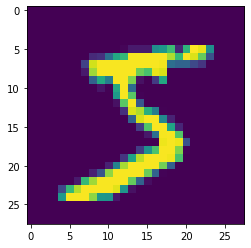

In [ ]:
plt.imshow(image.reshape(28, 28))

Note: 

Matplotlib has a default color mapping. called #viridis

more for vidis color map
https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html

This does not imply the actual image itself is in yellow, purple.

So, Deep Purple here is 0 while yellow is 1. Essentially there is no need to bother here.

If you are worried, you can convert to gray scale



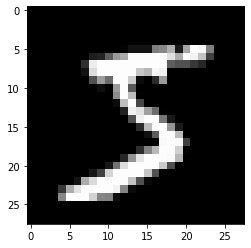

In [ ]:
plt.imshow(image.reshape(28, 28), cmap='gray')

To convert into reverse color mapping | black to white and white to black

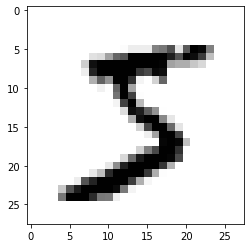

In [ ]:
#cmap = 'gist_yarg' | used for reverse coloring
plt.imshow(image.reshape(28, 28), cmap='gist_yarg') #viridis

There are 60000 datapoints in the image.
so, lets load the data in batches using dataloader

In [ ]:
torch.manual_seed(101)
#we will load 100 out of 60000 dataset
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [ ]:
#Now lets visualize those in train_loader using torchvision
from torchvision.utils import make_grid

#Formatting
np.set_printoptions(formatter = dict(int = lambda x : f'{x:4}'))

In [ ]:
#First Batch of images and labels
for images, labels in train_loader:
  break

In [ ]:
#print first 12(say, choose if you wish of your choice)
print("Labels : ", labels[:12].numpy())

Labels :  [   7    2    3    5    8    5    3    6    9    9    1    3]


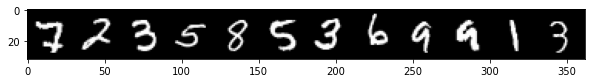

In [ ]:
#Now print first 12 images(you choose a number of your choice if you wish)
im = make_grid(images[:12], nrow=12)  #Default value of nrow =8
plt.figure(figsize=(10, 4))
#now we need to transform the image from CWH TO WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

Part 2

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size = 784, output_size=10, layers=[120, 84]):
    #Now instantiate the nn.Module
    super().__init__()
    self.fully_connected1 = nn.Linear(input_size, layers[0])
    self.fully_connected2 = nn.Linear(layers[0], layers[1])
    self.fully_connected3 = nn.Linear(layers[1], output_size)


  def forward(self, X):
    X = F.relu(self.fully_connected1(X))
    X = F.relu(self.fully_connected2(X))
    X = self.fully_connected3(X)

    return F.log_softmax(X, dim=1)  #Multi Class Classification



In [ ]:
torch.manual_seed(101)
model = MultilayerPerceptron()

In [ ]:
model

MultilayerPerceptron(
  (fully_connected1): Linear(in_features=784, out_features=120, bias=True)
  (fully_connected2): Linear(in_features=120, out_features=84, bias=True)
  (fully_connected3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#ANN  ->   CNN

for params in model.parameters():
  print(params.numel())

94080
120
10080
84
840
10


In [ ]:
#105,204 Total parameters

In [ ]:
criterion =nn.CrossEntropyLoss()
optmizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
images.view(100, -1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])